# Try Li Plating Sub Models

In [1]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import dfols
import signal
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from scipy import interpolate
from stopit import threading_timeoutable as timeoutable
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from batfuns import *
plt.rcParams = set_rc_params(plt.rcParams)

eSOH_DIR = "../data/esoh/"
oCV_DIR = "../data/ocv/"
fig_DIR = "../figures/figures_model/"
res_DIR = "../data/results_model/"
%matplotlib widget

In [2]:
parameter_values = get_parameter_values()

In [3]:
spm = pybamm.lithium_ion.SPM(
    {
        "SEI": "ec reaction limited",
        "loss of active material": "stress-driven",
    }
)
spme = pybamm.lithium_ion.SPMe(
    {
        "SEI": "ec reaction limited",
        "loss of active material": "stress-driven",
    }
)
spme_li = pybamm.lithium_ion.SPMe(
    {
        "SEI": "ec reaction limited",
        "loss of active material": "stress-driven",
        "lithium plating": "irreversible",
    }
)
# spm.print_parameter_info()
param=spme.param

In [4]:
cell = 1
cell_no,dfe,dfe_0,dfo_0,N,N_0 = load_data(cell,eSOH_DIR,oCV_DIR)
eps_n_data,eps_p_data,c_rate_c,c_rate_d,dis_set,Temp,SOC_0 = init_exp(cell_no,dfe,spme,parameter_values)
print(Temp)

25


In [5]:
parameter_values.search('plating')

Exchange-current density for plating [A.m-2]	0.001
Lithium plating transfer coefficient	0.7


In [6]:
parameter_values.update(
    {
      "Positive electrode LAM constant proportional term [s-1]": 1.27152e-07,
      "Negative electrode LAM constant proportional term [s-1]": 1.27272e-06,
      "Positive electrode LAM constant exponential term": 1.1992,
      "Negative electrode LAM constant exponential term": 1.1992,
      "SEI kinetic rate constant [m.s-1]":  4.60788219e-16, #1.08494281e-16 , 
      "EC diffusivity [m2.s-1]": 4.56607447e-19,#8.30909086e-19,
      "SEI growth activation energy [J.mol-1]": 1.87422275e+04,#1.58777981e+04,
      # "Exchange-current density for plating [A.m-2]":0.001,
      # "Lithium plating transfer coefficient": 0.7,
      # "Dead lithium decay constant [s-1]": 1E-4,
    },
    check_already_exists=False,
)

In [7]:
experiment = pybamm.Experiment(
    [
        ("Discharge at "+c_rate_d+dis_set,
         "Rest for 5 min",
         "Charge at "+c_rate_c+" until 4.2V", 
         "Hold at 4.2V until C/50")
    ] *dfe.N.iloc[-1],
    # ] *40,
    termination="50% capacity",
#     cccv_handling="ode",
)
all_sumvars_dict_spm = cycle_adaptive_simulation(spm, parameter_values, experiment,SOC_0, save_at_cycles=1)
# all_sumvars_dict_spme = cycle_adaptive_simulation(spme, parameter_values, experiment,SOC_0, save_at_cycles=1)

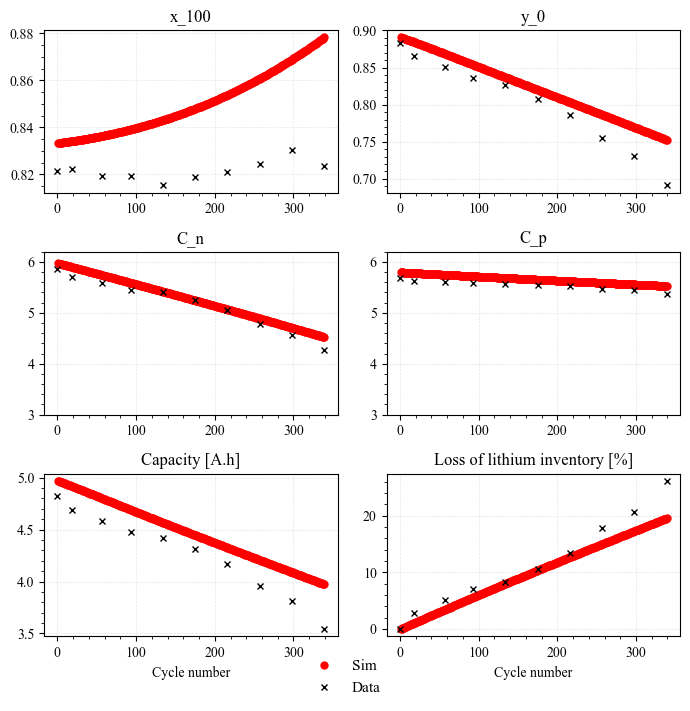

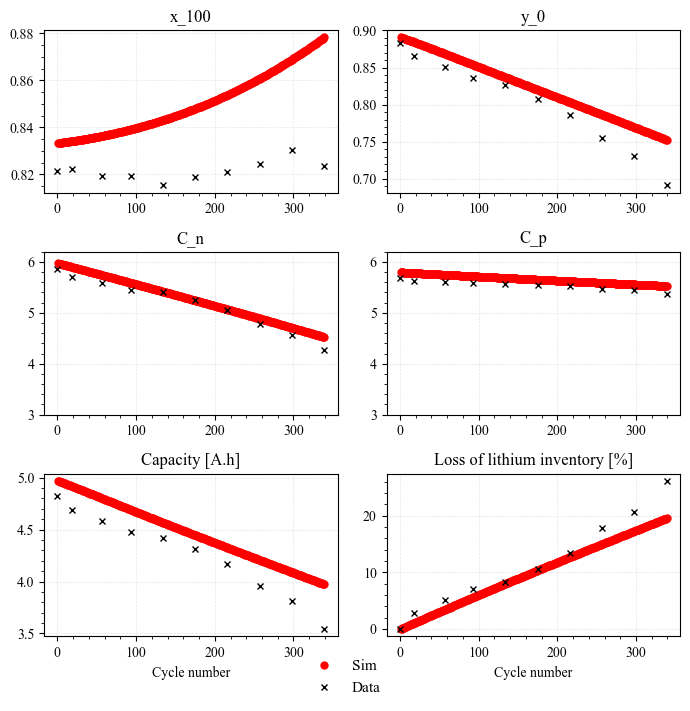

In [8]:
plotc(all_sumvars_dict_spm,dfe);

In [9]:
dfsdf

NameError: name 'dfsdf' is not defined

In [10]:
c_rate_d = '2C'
c_rate_c = '2C'

In [11]:
pybamm.set_logging_level("WARNING")
pybamm.set_logging_level("NOTICE")
# experiment = pybamm.Experiment(
#     [
#         ("Discharge at "+c_rate_d+dis_set,
#          "Rest for 5 min",
#          "Charge at "+c_rate_c+" until 4.2V", 
#          "Hold at 4.2V until C/50")
#     ],
#     termination="50% capacity",
# #     cccv_handling="ode",
# )
experiment = pybamm.Experiment(
    [
        (
         "Charge at "+c_rate_c+" until 4.2V", 
         "Hold at 4.2V until C/50"
         )
    ],
    termination="50% capacity",
#     cccv_handling="ode",
)

In [12]:
sim_long = pybamm.Simulation(spme_li, experiment=experiment, parameter_values=parameter_values, 
                            solver=pybamm.CasadiSolver("safe"))
sol_long = sim_long.solve(initial_soc=0)
solution1 = sol_long


2022-11-01 14:10:34.038 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (14.255 ms elapsed) --------------------
2022-11-01 14:10:34.042 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 1/2: Charge at 2C until 4.2V
2022-11-01 14:10:34.489 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 2/2: Hold at 4.2V until C/50
2022-11-01 14:10:35.725 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.966 Ah (originally 4.966 Ah, will stop at 2.483 Ah)
2022-11-01 14:10:35.726 - [NOTICE] callbacks.on_experiment_end(222): Finish experiment simulation, took 1.702 s


In [13]:
parameter_values.update(
    {
      # "Exchange-current density for plating [A.m-2]":0.001,
      "Lithium plating transfer coefficient": 0.5,
      # "Dead lithium decay constant [s-1]": 1E-4,
    },
    check_already_exists=False,
)

sim_long = pybamm.Simulation(spme_li, experiment=experiment, parameter_values=parameter_values, 
                            solver=pybamm.CasadiSolver("safe"))
sol_long = sim_long.solve(initial_soc=0)
solution2 = sol_long

2022-11-01 14:10:37.519 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (20.638 ms elapsed) --------------------
2022-11-01 14:10:37.520 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 1/2: Charge at 2C until 4.2V
2022-11-01 14:10:38.141 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 2/2: Hold at 4.2V until C/50
2022-11-01 14:10:39.101 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.966 Ah (originally 4.966 Ah, will stop at 2.483 Ah)
2022-11-01 14:10:39.103 - [NOTICE] callbacks.on_experiment_end(222): Finish experiment simulation, took 1.603 s


In [14]:
parameter_values.update(
    {
      "Exchange-current density for plating [A.m-2]":0.002,
      "Lithium plating transfer coefficient": 0.5,
      # "Dead lithium decay constant [s-1]": 1E-4,
    },
    check_already_exists=False,
)

sim_long = pybamm.Simulation(spme_li, experiment=experiment, parameter_values=parameter_values, 
                            solver=pybamm.CasadiSolver("safe"))
sol_long = sim_long.solve(initial_soc=0)
solution3 = sol_long

2022-11-01 14:10:41.279 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/1 (13.173 ms elapsed) --------------------
2022-11-01 14:10:41.280 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 1/2: Charge at 2C until 4.2V
2022-11-01 14:10:41.793 - [NOTICE] callbacks.on_step_start(182): Cycle 1/1, step 2/2: Hold at 4.2V until C/50
2022-11-01 14:10:42.763 - [NOTICE] callbacks.on_cycle_end(196): Capacity is now 4.966 Ah (originally 4.966 Ah, will stop at 2.483 Ah)
2022-11-01 14:10:42.764 - [NOTICE] callbacks.on_experiment_end(222): Finish experiment simulation, took 1.497 s


In [15]:
t1 =  solution1["Time [s]"].entries
V1 =  solution1["Terminal voltage [V]"].entries
I1 =  solution1["Current [A]"].entries
Q1 = -solution1['Discharge capacity [A.h]'].entries
Q_Li1 = solution1["Loss of capacity to lithium plating [A.h]"].entries
I_Li1 = solution1["X-averaged lithium plating interfacial current density"].entries

In [16]:
t2 =  solution2["Time [s]"].entries
V2 =  solution2["Terminal voltage [V]"].entries
I2 =  solution2["Current [A]"].entries
Q2 = -solution2['Discharge capacity [A.h]'].entries
Q_Li2 = solution2["Loss of capacity to lithium plating [A.h]"].entries
I_Li2 = solution2["X-averaged lithium plating interfacial current density"].entries

In [17]:
t3 =  solution3["Time [s]"].entries
V3 =  solution3["Terminal voltage [V]"].entries
I3 =  solution3["Current [A]"].entries
Q3 = -solution3['Discharge capacity [A.h]'].entries
Q_Li3 = solution3["Loss of capacity to lithium plating [A.h]"].entries
I_Li3 = solution3["X-averaged lithium plating interfacial current density"].entries

In [18]:
linestyles = ["dashed", "dotted", "solid"]
colors = ["tab:purple", "tab:cyan", "tab:red", "tab:green", "tab:blue"]

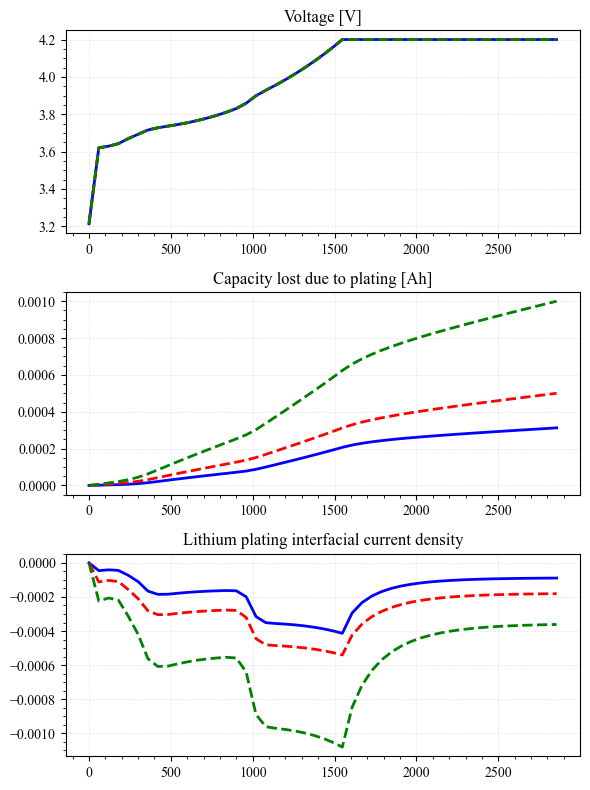

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
ax1 = axes.flat[0]
ax1.plot(t1,V1,'b')
ax1.plot(t2,V2,'r--')
ax1.plot(t3,V3,'g--')
ax1.set_title('Voltage [V]')
ax2 = axes.flat[1]
ax2.plot(t1,Q_Li1,'b')
ax2.plot(t1,Q_Li2,'r--')
ax2.plot(t3,Q_Li3,'g--')
ax2.set_title('Capacity lost due to plating [Ah]')
ax3=axes.flat[2]
ax3.plot(t1,I_Li1,'b')
ax3.plot(t1,I_Li2,'r--')
ax3.plot(t3,I_Li3,'g--')
ax3.set_title('Lithium plating interfacial current density')
fig.tight_layout()